In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import utils
import featurizer
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import classify
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import copy
CALIBRATION_FILE = "N_matrix_trial9.mat"
TEST_FOLDER = "test/"
TEST_FILE = TEST_FOLDER + "/sliding11.txt"

/Users/Can/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#First we need to featurize the experiment.
df = utils.process_data_files(TEST_FILE, CALIBRATION_FILE)
df_segs = featurizer.segment(df)
print len(df_segs)

test_data = []
for df_seg in df_segs:
    test_data.append(featurizer.featurize(df_seg))
    
# print len(test_data)
# print test_data[0].shape
test_data_copy = copy.deepcopy(test_data)

Index([u'time', u'Right Leg Pos', u'Left Leg Pos', u'Commanded Right Leg Pos',
       u'Commanded Left Leg Pos', u'DCR', u'DCL', u'GyroX', u'GyroY', u'GyroZ',
       u'AX', u'AY', u'AZ', u'RBEMF', u'LBEMF', u'VBatt', u'S1', u'S2', u'S3',
       u'S4', u'S5', u'S6', u'S7', u'S8'],
      dtype='object')
38


In [ ]:
#Random Forest Prediction
random_forest_predictions = classify.predict_random_forests(test_data)

In [ ]:
color_intervals = []
for i in xrange(len(df_segs)):
    if random_forest_predictions[i] == 1:
        color_intervals.append((min(df_segs[i]["time"]), max(df_segs[i]["time"])))

print len(color_intervals)
utils.plot_columns(df, [["Fx", "Fy", "Fz"], "F_mag", ["Mx", "My", "Mz"], "M_mag", ["AX", "AY", "AZ"], "A_mag", ["GyroX", "GyroY", "GyroZ"], "Gyro_mag"], display=True, save_figure=False, output_filename="FMAG.png", color_intervals=color_intervals)

In [ ]:
# XGB Predictions
test_data = copy.deepcopy(test_data_copy)
xgb_predictions = classify.predict_xgb_trees(test_data)

In [ ]:
# SVC Predictions
test_data = copy.deepcopy(test_data_copy)
svc_predictions = classify.predict_svc(test_data)

In [3]:
# dnn predictions
test_data = copy.deepcopy(test_data_copy)
test_data = np.array(test_data)
print test_data.shape
dnn_predictions = classify.predict_dnn(test_data)

(38, 70)

Running Neural Network...
CTL size: 117 ACT size: 99
Step #1, avg. loss: 0.99668
Step #101, epoch #50, avg. loss: 0.11380
Step #201, epoch #100, avg. loss: 0.01706
Step #301, epoch #150, avg. loss: 0.00636
Step #401, epoch #200, avg. loss: 0.00355
Step #501, epoch #250, avg. loss: 0.00233
Step #601, epoch #300, avg. loss: 0.00168
Step #701, epoch #350, avg. loss: 0.00130
Step #801, epoch #400, avg. loss: 0.00104
Step #901, epoch #450, avg. loss: 0.00086
Step #1, avg. loss: 0.99392
Step #101, epoch #50, avg. loss: 0.12934
Step #201, epoch #100, avg. loss: 0.02107
Step #301, epoch #150, avg. loss: 0.00784
Step #401, epoch #200, avg. loss: 0.00425
Step #501, epoch #250, avg. loss: 0.00275
Step #601, epoch #300, avg. loss: 0.00198
Step #701, epoch #350, avg. loss: 0.00151
Step #801, epoch #400, avg. loss: 0.00120
Step #901, epoch #450, avg. loss: 0.00100
Step #1, avg. loss: 0.98159
Step #101, epoch #50, avg. loss: 0.11196
Step #201, epoch #100, avg. loss: 0.01819
Step #301, epoch

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]
 
 [1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]
 
 [1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]
 
 [1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]
 
 [1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0]

In [4]:
color_intervals = []
for i in xrange(len(df_segs)):
    if dnn_predictions[i] == 1:
        color_intervals.append((min(df_segs[i]["time"]), max(df_segs[i]["time"])))

print len(color_intervals)
print color_intervals

14
[(4.6e-05, 0.51255799999999996), (2.8218649999999998, 3.3333759999999999), (3.3343769999999999, 3.84789), (3.590633, 4.1051469999999997), (3.8488910000000001, 4.362406), (4.1061480000000001, 4.6196609999999998), (4.3634050000000002, 4.8769179999999999), (5.391432, 5.9029429999999996), (5.6476879999999996, 6.1601999999999997), (5.9039440000000001, 6.4164560000000002), (6.1612010000000001, 6.6727119999999998), (6.4174569999999997, 6.9299689999999998), (6.6737130000000002, 7.1872259999999999), (6.9319709999999999, 7.4434820000000004)]


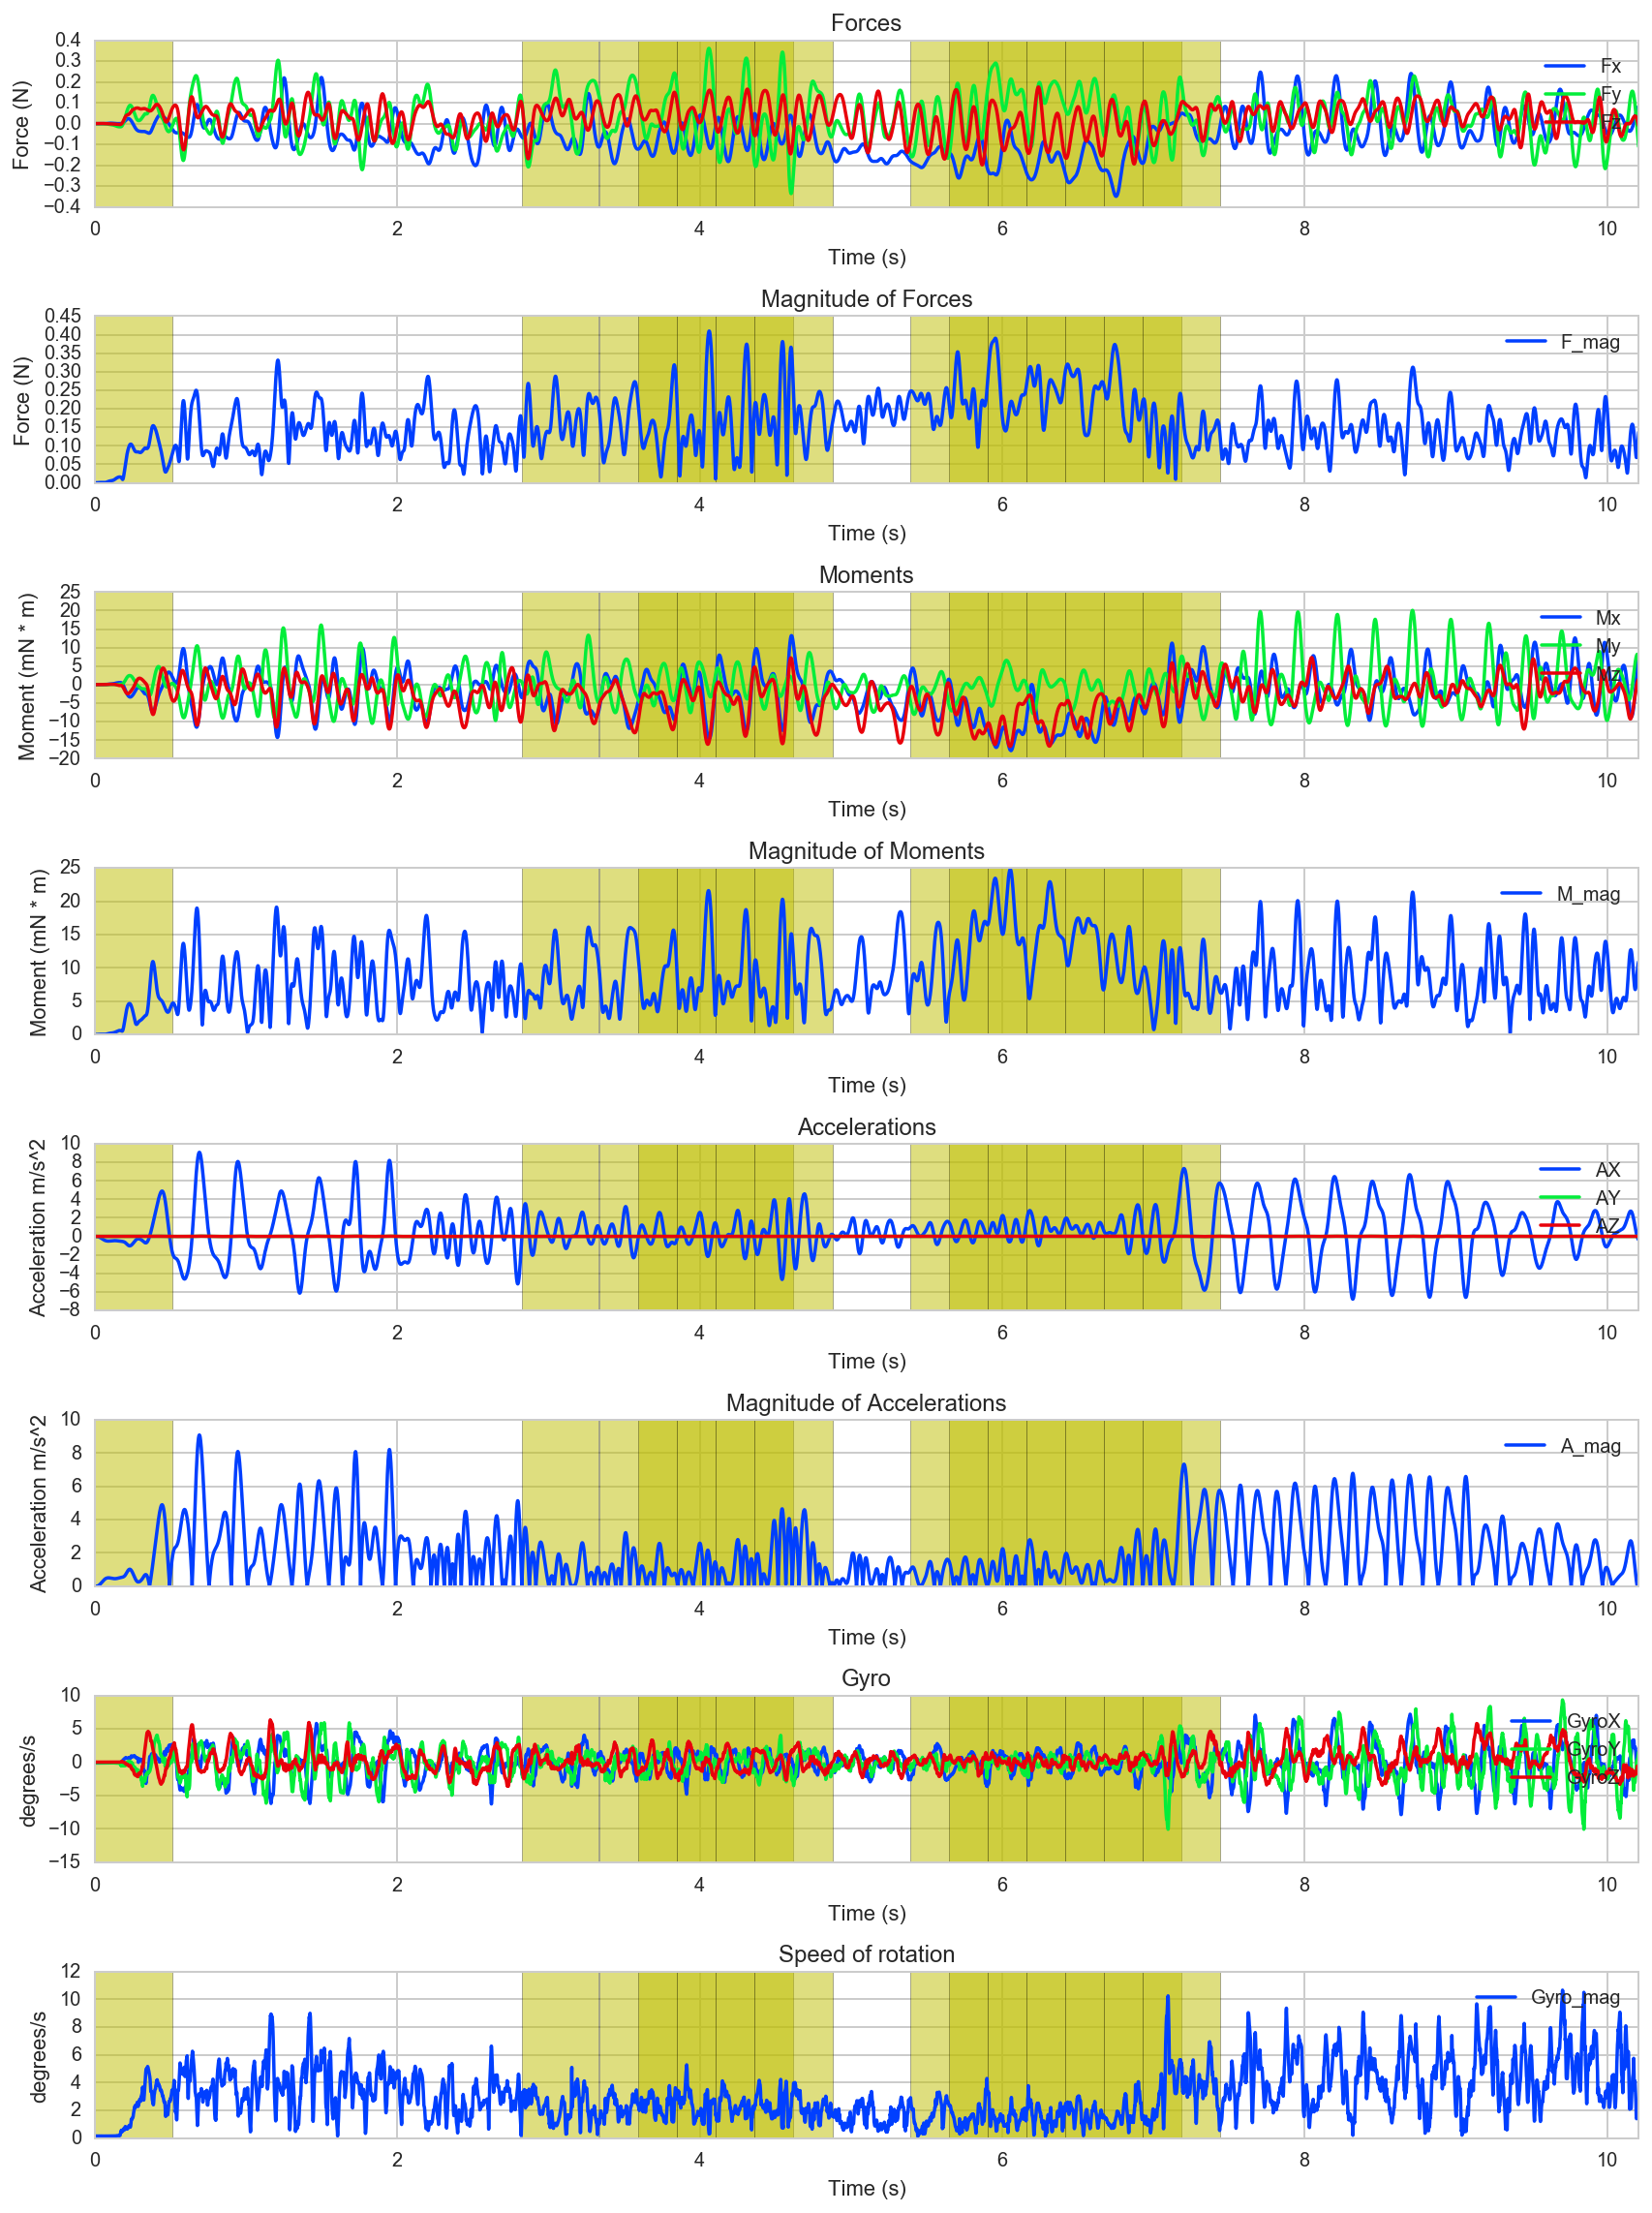

In [5]:
utils.plot_columns(df, [["Fx", "Fy", "Fz"], "F_mag", ["Mx", "My", "Mz"], "M_mag", ["AX", "AY", "AZ"], "A_mag", ["GyroX", "GyroY", "GyroZ"], "Gyro_mag"], display=True, save_figure=False, output_filename="FMAG.png",color_intervals=color_intervals)